In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import the dataset
tcars=pd.read_csv("C:/Users/91814/Downloads/Toyoto_corrola.csv")
tcars

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [3]:
#EDA
tcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [4]:
tcars.isnull().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
tcars.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [6]:
tcars2=pd.concat([tcars.iloc[:,2:7],tcars.iloc[:,8:]],axis=1)
tcars2

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [7]:
tcars2[tcars2.duplicated()]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
113,24950,8,13253,116,5,5,1320


In [8]:
tcars3=tcars2.drop_duplicates().reset_index(drop=True)
tcars3

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [9]:
tcars3=tcars3.rename({'Age_08_04':'Age'},axis=1)
tcars3

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [10]:

#Correlation Analysis
tcars3.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,0.021238,1.000000


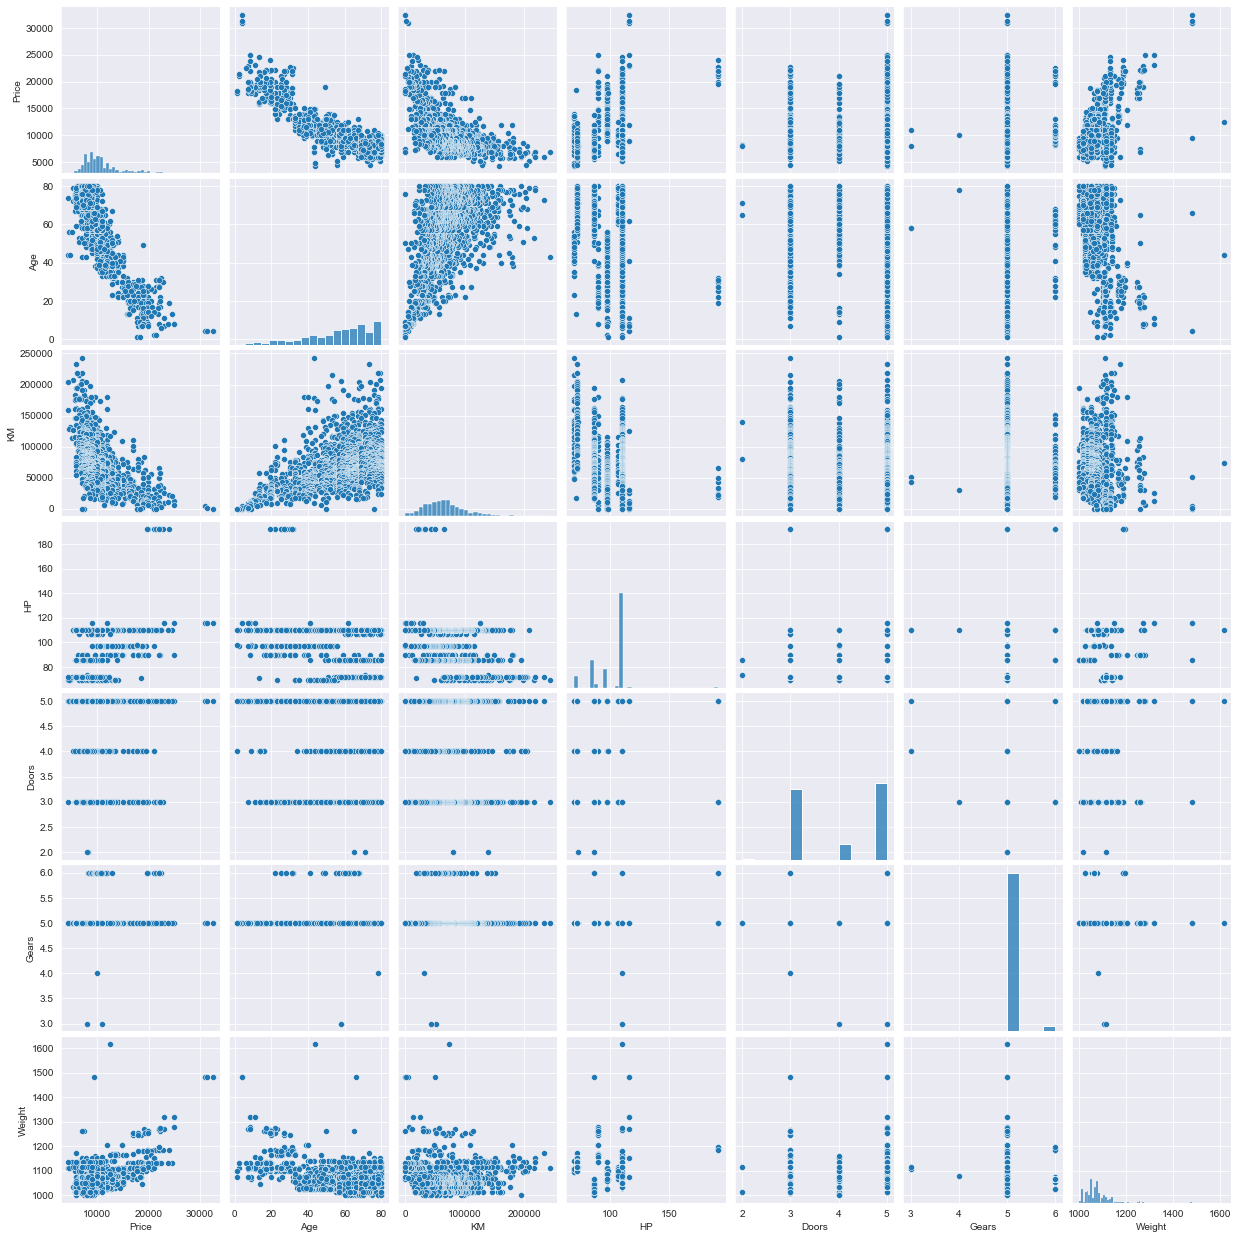

In [11]:
# Scatterplot between variables along with histograms
sns.set_style(style='darkgrid')
sns.pairplot(tcars3)

In [12]:
#Model Building
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=tcars3).fit()

In [13]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept   -6838.987234
Age          -122.288250
KM             -0.019928
HP             28.327782
Doors          -8.715826
Gears         625.297840
Weight         18.455133
dtype: float64

In [14]:
# Finding tvalues and pvalues
np.round((model.tvalues),5) , np.round((model.pvalues),6)

(Intercept    -5.20480
 Age         -46.77468
 KM          -16.49015
 HP           10.84083
 Doors        -0.21806
 Gears         3.16945
 Weight       22.14159
 dtype: float64,
 Intercept    0.000000
 Age          0.000000
 KM           0.000000
 HP           0.000000
 Doors        0.827413
 Gears        0.001560
 Weight       0.000000
 dtype: float64)

In [15]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # model accuracy is 86.10 %

(0.8615946984866649, 0.8610131636063568)

In [16]:
# Build SLR and MLR models for insignificant variable 'Doors'
# Also find their tvalues and pvalues

In [17]:
slr=smf.ols('Price~Doors',data=tcars3).fit()
slr.tvalues , slr.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [18]:
# Doors variable has significant pvalue hence has to be considered in regression equation

In [19]:
#Model Validation Techniques
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

In [20]:
rsq_age=smf.ols('Age~KM+HP+Doors+Gears+Weight',data=tcars3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+Doors+Gears+Weight',data=tcars3).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+Doors+Gears+Weight',data=tcars3).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_dr=smf.ols('Doors~Age+KM+HP+Gears+Weight',data=tcars3).fit().rsquared
vif_dr=1/(1-rsq_dr)

rsq_gr=smf.ols('Gears~Age+KM+HP+Doors+Weight',data=tcars3).fit().rsquared
vif_gr=1/(1-rsq_gr)

rsq_wt=smf.ols('Weight~Age+KM+HP+Doors+Gears',data=tcars3).fit().rsquared
vif_wt=1/(1-rsq_wt)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','Doors','Gears','Weight'],'Vif':[vif_age,vif_km,vif_hp,vif_dr,vif_gr,vif_wt]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.866057
1,KM,1.626264
2,HP,1.214147
3,Doors,1.148708
4,Gears,1.096575
5,Weight,1.502749


In [21]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

C:\Users\91814\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


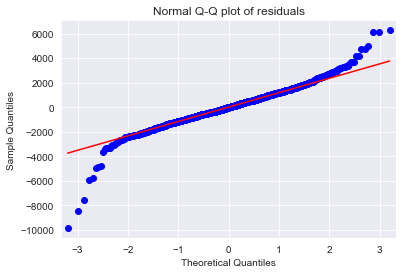

In [22]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [24]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [25]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

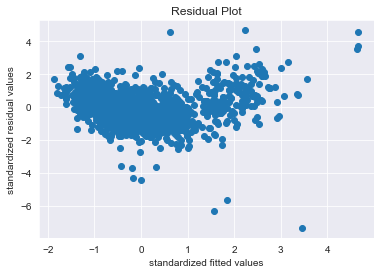

In [26]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


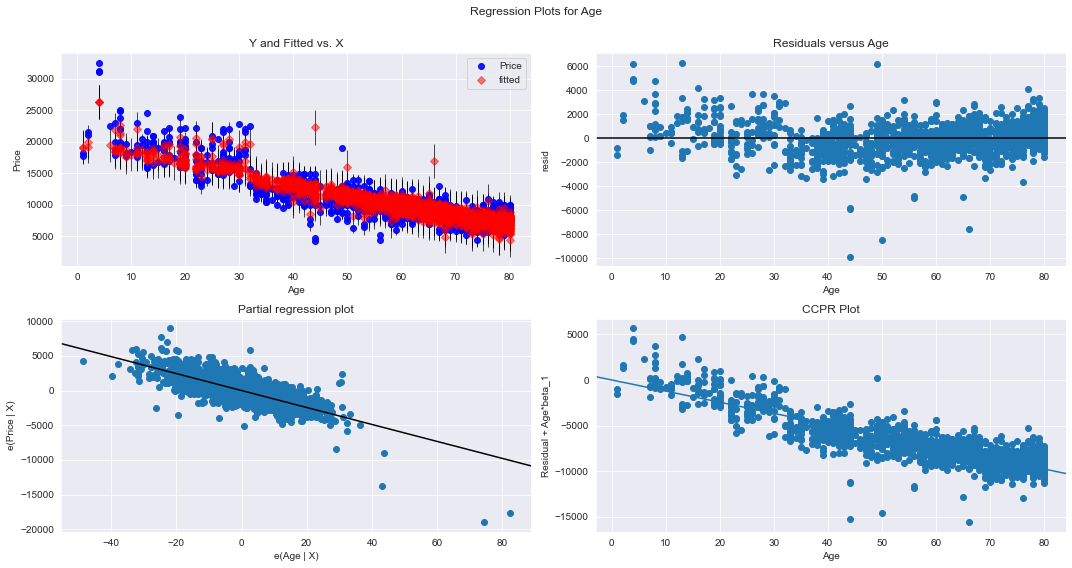

In [27]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

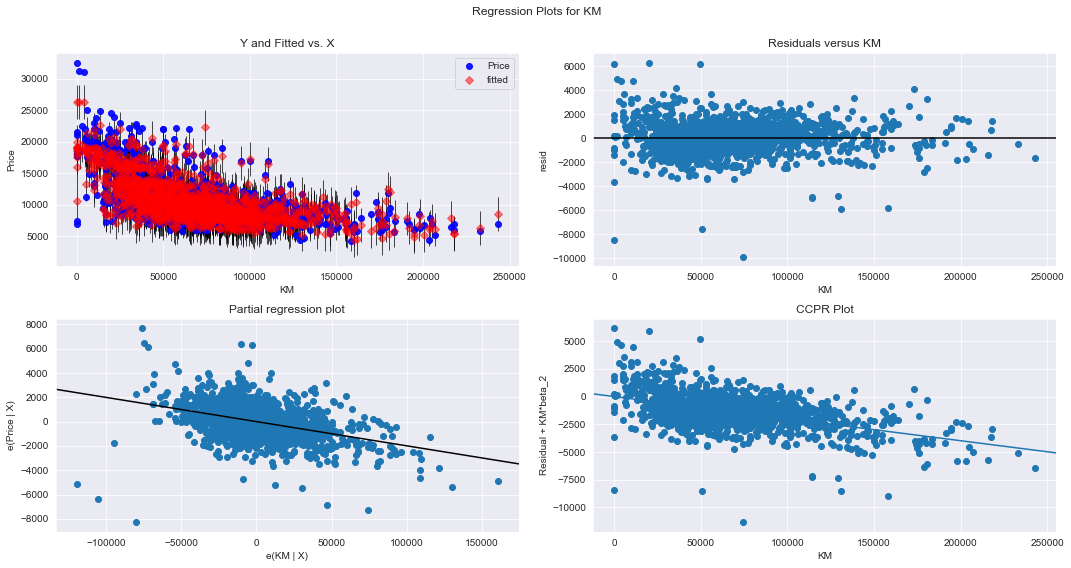

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()


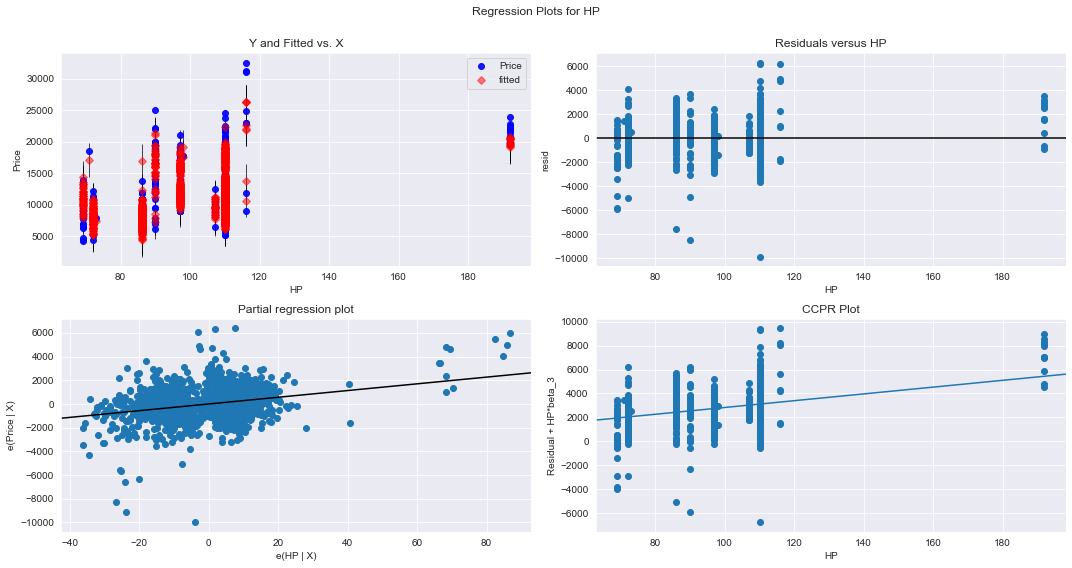

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

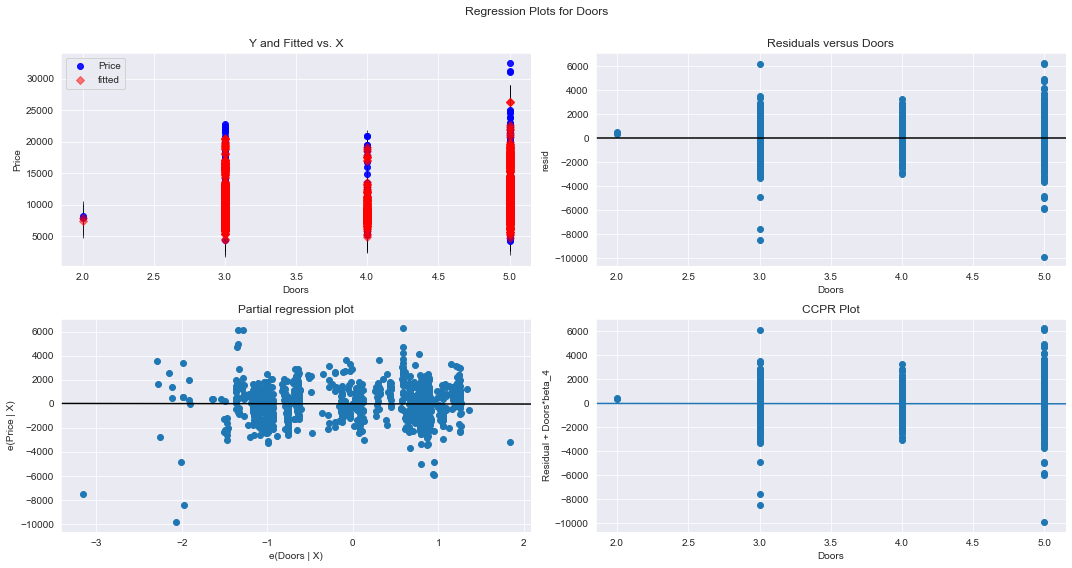

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()


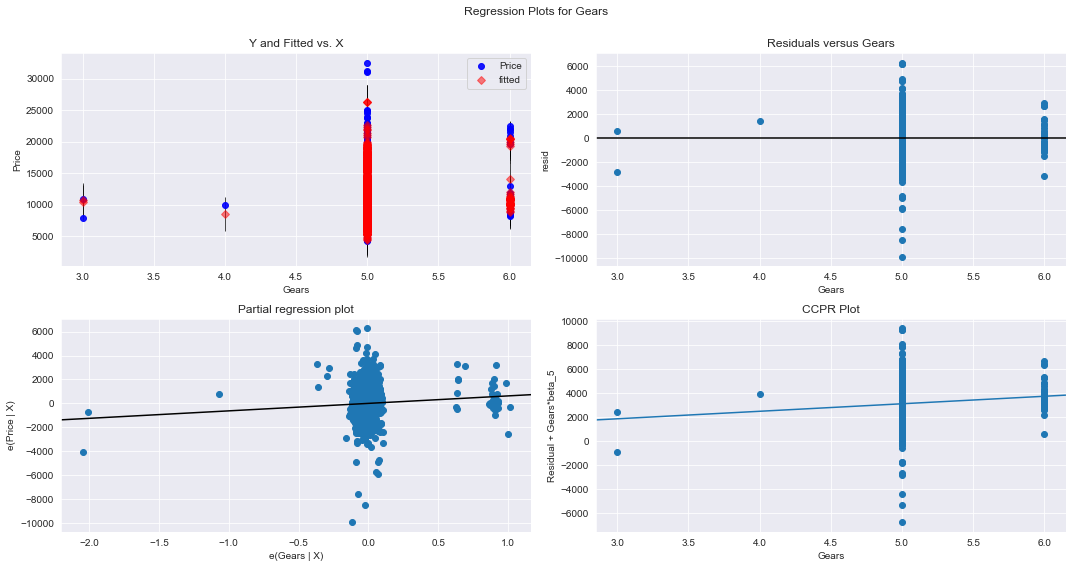

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()


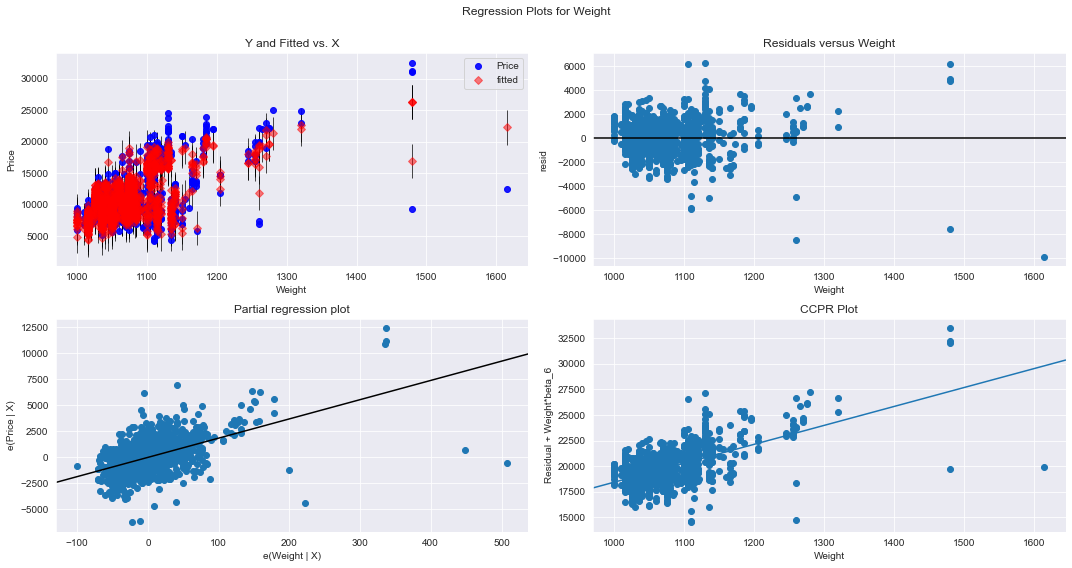

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()


In [33]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([4.84834865e-03, 2.81504747e-03, 3.49062601e-03, ...,
       4.29681961e-06, 8.15626746e-04, 1.20038984e-02])

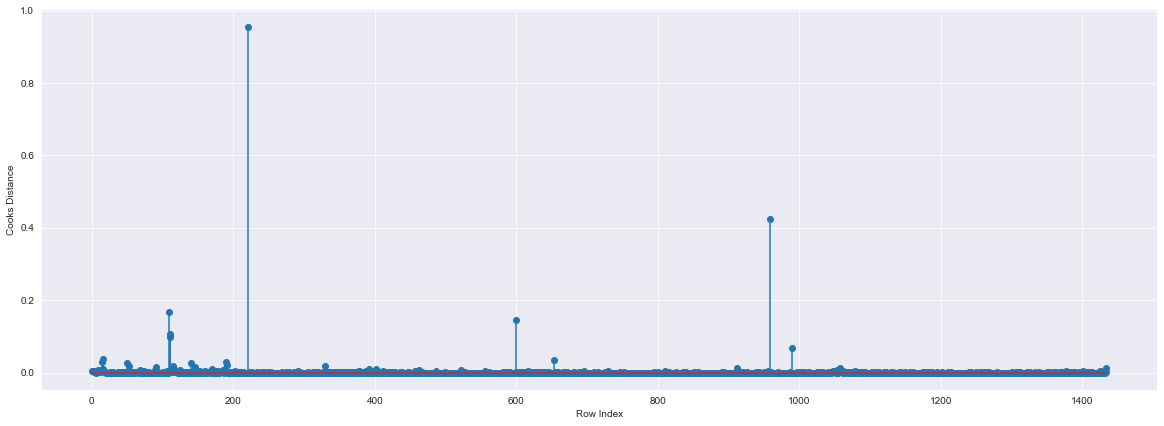

In [34]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(tcars3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(220, 0.9561392473392505)

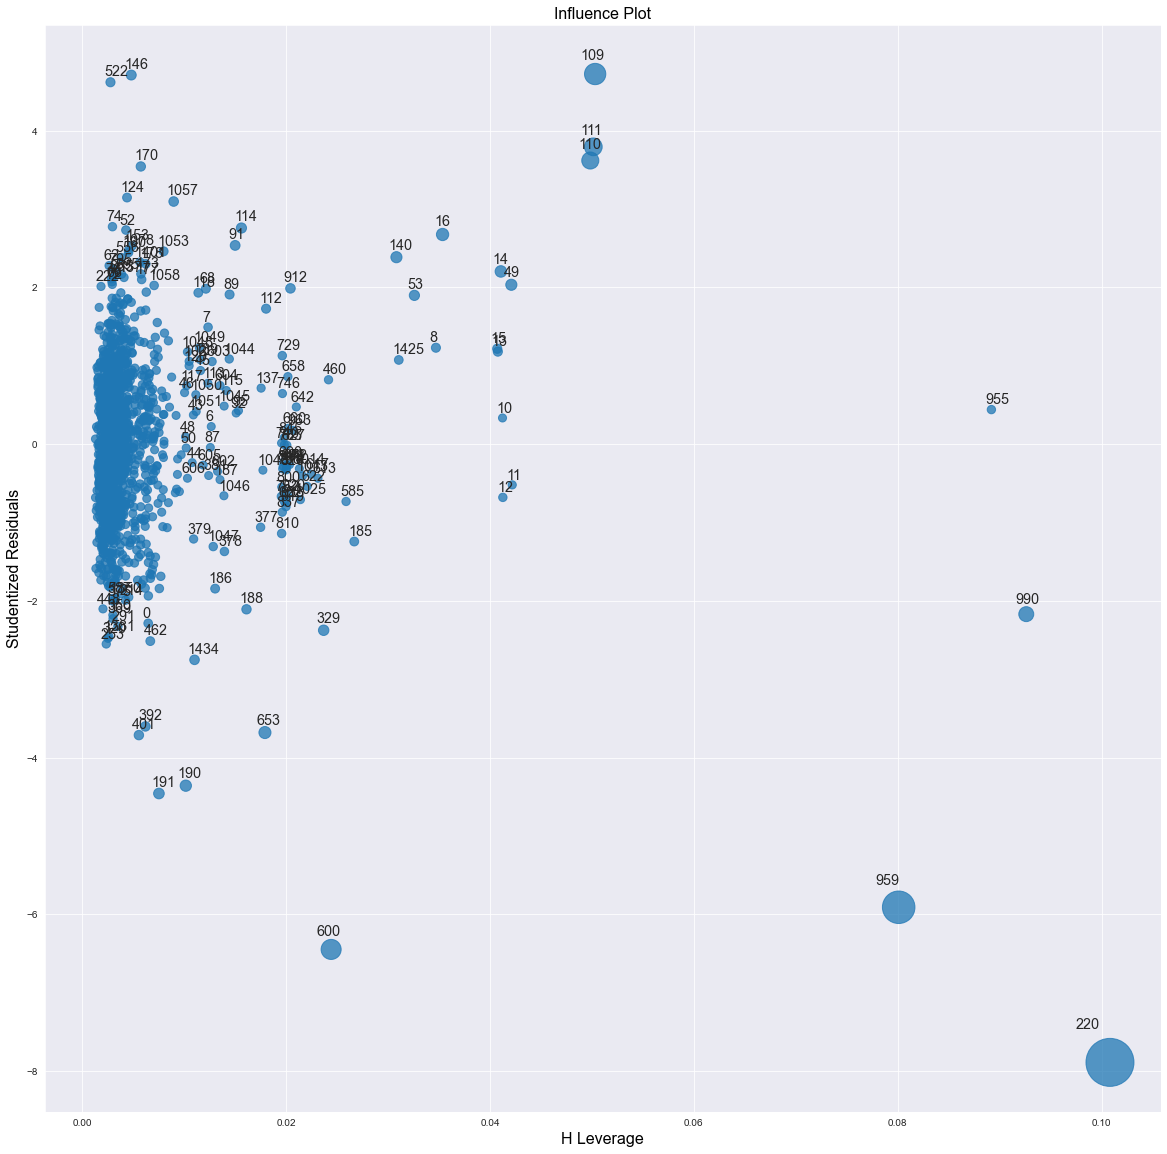

In [36]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [37]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=tcars3.shape[1]
n=tcars3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.016724738675958188

In [38]:
tcars3[tcars3.index.isin([109, 146, 522,220, 600, 959])] 

,Price,Age,KM,HP,Doors,Gears,Weight
109,32500,4,1,116,5,5,1480
146,24500,13,19988,110,5,5,1130
220,12450,44,74172,110,5,5,1615
522,18950,49,49568,110,3,5,1105
600,7500,50,1,90,3,5,1260
959,9390,66,50806,86,3,5,1480


In [39]:
#Improving the Model
# Creating a copy of data so that original dataset is not affected
tcars_new=tcars3.copy()
tcars_new

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [40]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
tcars4=tcars_new.drop(tcars_new.index[[109, 146, 522,220, 600, 959]],axis=0).reset_index(drop=True)
tcars4

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1424,7500,69,20544,86,3,5,1025
1425,10845,72,19000,86,3,5,1015
1426,8500,71,17016,86,3,5,1015
1427,7250,70,16916,86,3,5,1015


In [41]:
# Collinearity Remedy step is skipped as no collinearity
#Model - Re-build, Re-check and Re-improve - 2
model1=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=tcars4).fit()

In [42]:
# Get influencers using cook's distance
(c_1,_)=model1.get_influence().cooks_distance
c_1

array([7.36430045e-03, 4.16825389e-03, 5.58115630e-03, ...,
       1.36089800e-09, 1.09207875e-03, 1.89923626e-02])

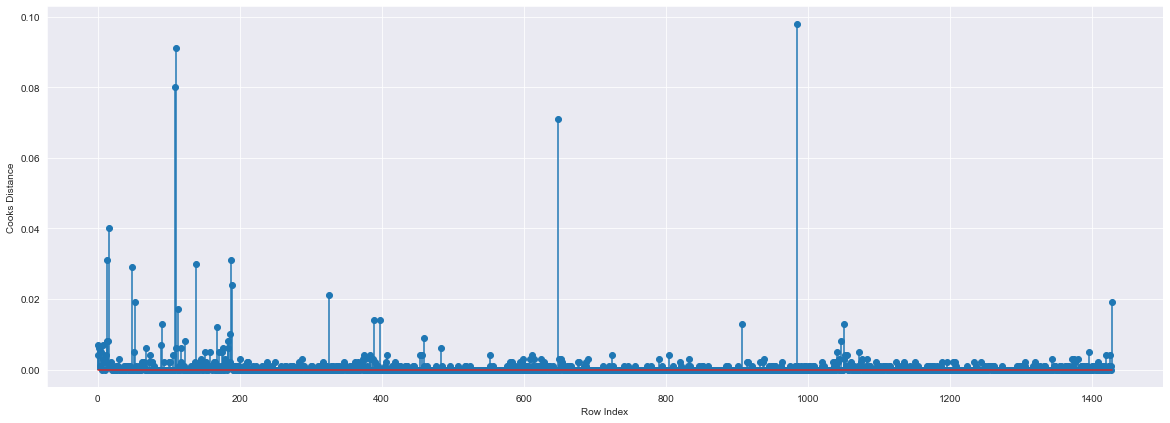

In [43]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(tcars4)),np.round(c_1,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
# Index and value of influencer where C>0.5
np.argmax(c_1) , np.max(c_1)

(984, 0.09833416819882905)

In [45]:
#Final Model
final_model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=tcars4).fit()

In [46]:
final_model.rsquared , final_model.aic

(0.8766556643754377, 24435.50766892256)

In [47]:
#Model Predictions
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Doors":4,"Gears":5,"Weight":1012},index=[0])
new_data

,Age,KM,HP,Doors,Gears,Weight
0,12,40000,80,4,5,1012


In [48]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14468.396696
dtype: float64

In [49]:
# Automatic Prediction of Price with 87.66% accurcy
pred_y=final_model.predict(tcars4)
pred_y

0       16818.575168
1       16246.677211
2       16820.217198
3       16452.409984
4       16315.728511
            ...     
1424     8877.747697
1425     8343.181407
1426     8501.510371
1427     8618.320481
1428    11030.263847
Length: 1429, dtype: float64